In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import pytesseract
import imutils
import easyocr


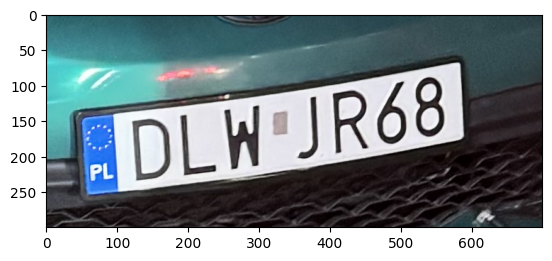

In [55]:


def download_image(image_link: str) -> str:
    # Download the image and save it locally as a .jpg file
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename

url = "https://tablica-rejestracyjna.pl/images/photos/20241217184503.jpeg"
image_path = download_image(url)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[2800:3100, 2500:3200]


plt.imshow(image)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[155 157]]

 [[131 159]]

 [[135 224]]

 [[167 208]]]
[([[57, 205], [99, 205], [99, 241], [57, 241]], 'PL', 0.8278075601648922), ([[106.57281127576427, 133.7184338272928], [575.0737814273159, 72.9923818844914], [581.4271887242357, 190.2815661727072], [112.9262185726841, 250.00761811550862]], 'DLH JR68', 0.5050252299261974)]


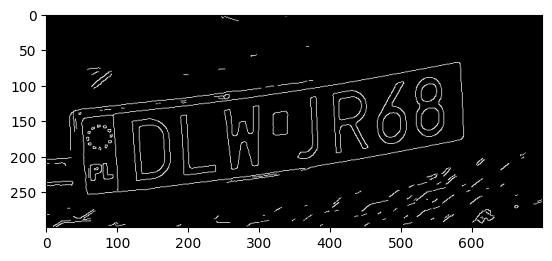

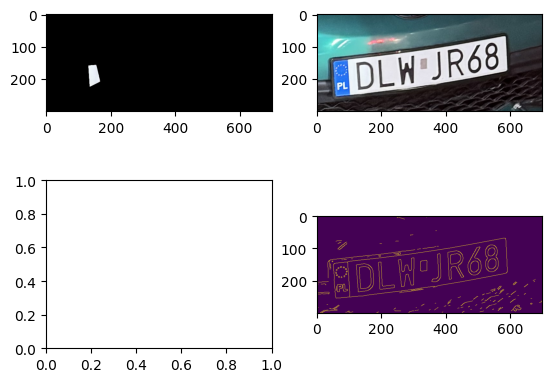

In [61]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 200, 230)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

print(location)

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(new_image)
axarr[0,1].imshow(image)
axarr[1,1].imshow(edged)


reader = easyocr.Reader(['en'])
result = reader.readtext(image)
print(result)


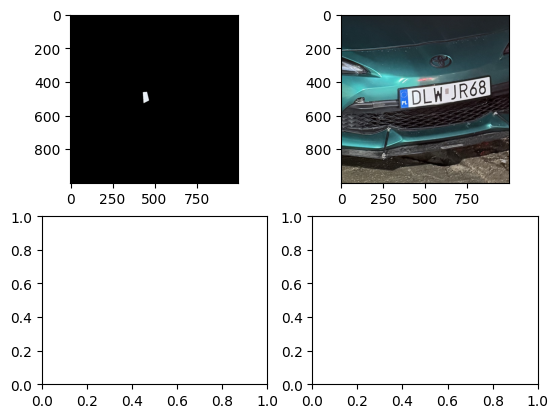